In [347]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [534]:
train_df = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')
Survived_train = train_df.Survived.copy()
#train_no_survive = train_df.drop(['Survived'],axis = 1)
dataset = pd.concat([train_no_survive,test_df],axis = 0)

In [535]:
dataset['Age'] = dataset.Age.fillna(dataset.Age.mean())
dataset['Title'] = dataset.Name.str.split(',',expand = True)[1].str.split('.',expand = True)[0].str.strip(' ')
dataset['LastName'] = dataset.Name.str.split(',',expand = True)[0]
dataset = pd.concat([dataset,pd.get_dummies(dataset['Sex'])],axis = 1)

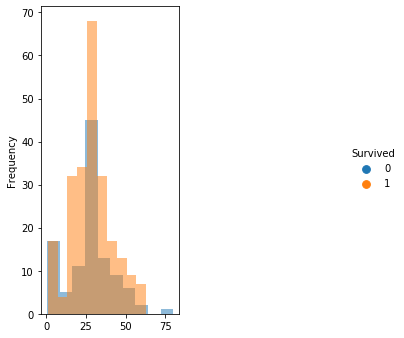

In [536]:
sns.catplot(x = 'Sex',y='Age',hue = 'Survived',data = train_df)

train_df = pd.read_csv('titanic/train.csv')
train_df['Age'] = train_df.Age.fillna(train_df['Age'].mean())
train_df = pd.concat([train_df,pd.get_dummies(train_df['Sex'])],axis = 1)
survived_male = train_df[(train_df['Survived']==1) & (train_df['male']==1)]
survived_female = train_df[(train_df['Survived'] == 1) & (train_df['female'] == 1)]
#train_df[train_df['Survived'] == 1 ].Age.plot.hist()
fig = plt.subplot(1,2,1)
survived_male.Age.plot.hist(alpha = 0.5)
survived_female.Age.plot.hist(alpha = 0.5)

In [537]:
man_title = ["Capt","Don","Major","Col","Rev","Dr","Sir","Mr","Jonkheer"]
woman_title = ["Dona","the Countess","Mme","Mlle","Ms","Miss","Lady","Mrs"]
man_map = {}
woman_map = {}
for title in man_title:
    man_map[title] = 'man'
for title in woman_title:
    woman_map[title] = 'woman'
dataset['Title'] = dataset['Title'].apply(lambda x:'man' if x in man_title else x)
dataset['Title'] = dataset['Title'].apply(lambda x:'woman' if x in woman_title else x)
dataset['Title'] = dataset['Title'].apply(lambda x:'boy' if x == 'Master' else x)

In [538]:
train_df = dataset[:891].copy()
train_df = pd.concat([train_df,Survived_train],axis = 1)

In [539]:
freqName = train_df.groupby('LastName').size()
train_df['LastNameFreq'] = train_df['LastName'].map(freqName)
train_df['LastName'] = np.where(train_df['Sex'] == 'male','NoGroup',train_df['LastName'])
train_df['LastName'] = np.where(train_df['LastNameFreq'] < 2, 'NoGroup', train_df['LastName'])

In [540]:
train_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,female,male,Survived,LastNameFreq
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,man,NoGroup,0,1,0,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,woman,NoGroup,1,0,1,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,woman,NoGroup,1,0,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,woman,Futrelle,1,0,1,2
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,man,NoGroup,0,1,0,2


In [542]:
survivalRate = train_df.groupby('LastName').Survived.mean()
train_df['LastNameSurvival'] = train_df['LastName'].map(survivalRate)
train_df.groupby('LastNameSurvival').size()

LastNameSurvival
0.000000     47
0.166667      6
0.322404    732
0.666667      3
1.000000    103
dtype: int64

In [545]:
train_df[(train_df['LastNameSurvival'] > 0.8) & (train_df['Title']=='woman') ]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,female,male,Survived,LastNameFreq,LastNameSurvival
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,woman,Futrelle,1,0,1,2,1.0
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,woman,Johnson,1,0,1,6,1.0
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,woman,Nasser,1,0,1,2,1.0
10,11,3,"Sandstrom, Miss. Marguerite Rut",female,4.000000,1,1,PP 9549,16.7000,G6,S,woman,Sandstrom,1,0,1,2,1.0
25,26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.000000,1,5,347077,31.3875,NaN,S,woman,Asplund,1,0,1,4,1.0
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.000000,1,0,2651,11.2417,NaN,C,woman,Nicola-Yarred,1,0,1,2,1.0
43,44,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.000000,1,2,SC/Paris 2123,41.5792,NaN,C,woman,Laroche,1,0,1,3,1.0
52,53,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,D33,C,woman,Harper,1,0,1,4,1.0
58,59,2,"West, Miss. Constance Mirium",female,5.000000,1,2,C.A. 34651,27.7500,NaN,S,woman,West,1,0,1,3,1.0
85,86,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.000000,3,0,3101278,15.8500,NaN,S,woman,Backstrom,1,0,1,2,1.0
